# Proyek Analisis Data: Air-Quality-Dataset
- **Nama:** Albi Akhsanul Hakim
- **Email:** albiakhsanulhakim24@gmail.com
- **ID Dicoding:** albi_akhsanul_hakim_36fq

## Menentukan Pertanyaan Bisnis

- Apakah terdapat perbedaan signifikan dalam jumlah penyewaan antara pengguna berlangganan dan pengguna non-berlangganan?
- Apakah jumlah penyewaan sepeda dipengaruhi oleh musim?
- Apakah jumlah penyewaan sepeda berubah sepanjang hari berdasarkan jam?

## Import Semua Packages/Library yang Digunakan

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Membaca Isi Dari "day.csv"**

In [30]:
daily_df = pd.read_csv("data/day.csv")
daily_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


**Insight:**
- Terlihat dataset tersebut berisikan informasi tentang data penyewaan sepeda dalam format harian pada tahun 2011
- Selain berisikan data jumlah penyewa, dataset juga memberikan informasi-informasi lain seperti musim, suhu, kelembapan, dan lain-lainya. Informasi-informasi tersebut dapat membantu kita mengetahui lebih lanjut cerita apa yang ada di dalam dataset terebut.

**Membaca Isi Dari "hour.csv"**

In [31]:
hourly_df = pd.read_csv("data/hour.csv")
hourly_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
- Terlihat dataset tersebut berisikan informasi tentang data penyewaan sepeda dalam format jam-jam an pada tahun 2011
- Informasi lainya yang dijelaskan di dataset ini sama persis seperti "day.csv" namun bersifat lebih rinci karena selain mencamtukan hari data itu diambil namun juga jam-nya.

### Assessing Data

**Melihat Struktur Data Dari Dataset**


In [32]:
print(daily_df.info())
print(">-----------------------------<")
print(hourly_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
>-----------------------------<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 

**Insight:**
- Terlihat bahwa dari kedua dataset tersebut tidak ditemukan missing value dan juga kebanyakan colomnya memiliki tipe data int dan juga float sehingga dapat memudahkan proses analisis data
- Mungkin perubahan yang perlu dilakukan adalah mengubah tipe data colom "dteday" menjadi datetime agar mempermudah proses analissis.

**Mengecek Null Dan Juga Duplicate**

In [33]:
# Menyimpan data null dan duplicate ke dalam variable
null_daily = daily_df.isna().sum().sum()
null_hourly = hourly_df.isna().sum().sum()
dup_daily = daily_df.duplicated().sum()
dup_hourly = hourly_df.duplicated().sum()

# Menampilkan isi variable
print("Dalam Dataset daily.csv terdapat (",null_daily,") data kosong dan (",dup_daily,") data kembar")
print("Dalam Dataset hourly.csv terdapat (",null_hourly,") data kosong dan (",dup_hourly,") data kembar")


Dalam Dataset daily.csv terdapat ( 0 ) data kosong dan ( 0 ) data kembar
Dalam Dataset hourly.csv terdapat ( 0 ) data kosong dan ( 0 ) data kembar


**Insight:**
- Tidak ditemukan data kosong maupun data kembar di dalam dataset sehingga data siap untuk lanjut ke tahap berikutnya

### Cleaning Data

**Menghapus beberapa kolom yang tidak dipakai**

In [34]:
# Menghapus kolom langsung dari dataframe asli
daily_df.drop(['mnth','yr','holiday'], axis=1, inplace=True)
hourly_df.drop(['mnth','yr','holiday'], axis=1, inplace=True)

# Cek informasi dataframe yang telah dimodifikasi
print(daily_df.info())
print(">-----------------------------<")
print(hourly_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   atemp       731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  casual      731 non-null    int64  
 11  registered  731 non-null    int64  
 12  cnt         731 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.4+ KB
None
>-----------------------------<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      -------------

**Insight:**
- Dari dataframe daily kita menghilangkan kolom holiday, mnth dan year. Kolom holiday dihapus karena sudah ada kolom workday dan nantinya akan dibuat kolom baru untuk membedakan weekend dan weekday, untuk kolom mnth dihapus karena sudah ada kolom season, sedangkan kolom yr dihapus karena tidak diperlukan.

**Mengubah tipe data dteday**

In [35]:
# Mengubah tipe data dteday dari object menjadi datetime agar mempermudah EDA
daily_df['dteday'] = pd.to_datetime(daily_df['dteday'])
hourly_df['dteday'] = pd.to_datetime(hourly_df['dteday'])
print(daily_df['dteday'].dtype)
print(hourly_df['dteday'].dtype)

datetime64[ns]
datetime64[ns]


**Mengubah beberapa colom tipe data dari int ke category**

In [36]:
# Mengubah tipe data 3 kolom ini menjadi category untuk mempermudah proses analisis data
columns = ['season', 'weekday', 'weathersit']
 
for column in columns:
    daily_df[column] =  daily_df[column].astype("category")
    hourly_df[column] =  hourly_df[column].astype("category")

for column in columns:
    print(daily_df[column].dtype)
    print(hourly_df[column].dtype)

category
category
category
category
category
category


**Mengganti nama kolom dan isi kolom agar lebih mudah dipahami**

In [55]:
# Menggani nama kolom dataframe
daily_df.rename(columns={'weekday':'day_of_week', 'weathersit':'weather_situation','hum':'humidity','cnt':'count'},inplace=True)
hourly_df.rename(columns={'hr':'hour','weekday':'day_of_week', 'weathersit':'weather_situation','hum':'humidity','cnt':'count'},inplace=True)

# Mengubah isi kolom dari int ke string agar mudah dipahami
# Mengubah isi season 
daily_df['season'] = daily_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
hourly_df['season'] = hourly_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
# Mengubah isi day_of_week

daily_df['day_of_week'] = daily_df['day_of_week'].replace({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})
hourly_df['day_of_week'] = hourly_df['day_of_week'].replace({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})
# Mengubah isi day_of_week
daily_df['weather_situation'] = daily_df['weather_situation'].replace({1: 'clear', 2: 'misty', 3: 'light_rain/snow', 4: 'heavy_rain/snow'})
hourly_df['weather_situation'] = hourly_df['weather_situation'].replace({1: 'clear', 2: 'misty', 3: 'light_rain/snow', 4: 'heavy_rain/snow'})

In [38]:
print(daily_df.head())
print(">-----------------------------------------------------<")
print(hourly_df.head())

   instant     dteday  season day_of_week  workingday weather_situation  \
0        1 2011-01-01  spring    saturday           0             misty   
1        2 2011-01-02  spring      sunday           0             misty   
2        3 2011-01-03  spring      monday           1             clear   
3        4 2011-01-04  spring     tuesday           1             clear   
4        5 2011-01-05  spring   wednesday           1             clear   

       temp     atemp  humidity  windspeed  casual  registered  count  
0  0.344167  0.363625  0.805833   0.160446     331         654    985  
1  0.363478  0.353739  0.696087   0.248539     131         670    801  
2  0.196364  0.189405  0.437273   0.248309     120        1229   1349  
3  0.200000  0.212122  0.590435   0.160296     108        1454   1562  
4  0.226957  0.229270  0.436957   0.186900      82        1518   1600  
>-----------------------------------------------------<
   instant     dteday  season  hour day_of_week  workingday w

**Insights:**
- Mengubah tipe data season, weekday, dan weathersit dari int menjadi category agar mempermudah kita dalam menganalisis data dan saat menampilkanya nanti.
- Mengubah beberapa nama column agar lebih familiar dan mudah diingat.
- Mengubah isi dari kolom season, day_of_week, dan weather_situation yang awalnya angka-angka numerik menjadi string yang sesuai, misal bila season awalnya memiliki nilai 1 akan diubah menjadi 'spring' sehingga lebih rapi.

**Membuat kolom baru untuk memihkan weekend dan weekday bernama "day_type"**

In [39]:
# Membuat fungsi untuk memilah data dengan hari weekend atau weekday
def get_day_type(day_of_week):
    if day_of_week in ["saturday", "sunday"]:
        return "weekend"
    else: 
        return "weekdays"
    
# Membuat kolom baru untuk menentukan hari weekend atau weekday
daily_df["day_type"] = daily_df["day_of_week"].apply(get_day_type)
hourly_df["day_type"] = hourly_df["day_of_week"].apply(get_day_type)

print(daily_df.head())
print(">-----------------------------------------------------<")
print(hourly_df.head())

   instant     dteday  season day_of_week  workingday weather_situation  \
0        1 2011-01-01  spring    saturday           0             misty   
1        2 2011-01-02  spring      sunday           0             misty   
2        3 2011-01-03  spring      monday           1             clear   
3        4 2011-01-04  spring     tuesday           1             clear   
4        5 2011-01-05  spring   wednesday           1             clear   

       temp     atemp  humidity  windspeed  casual  registered  count  \
0  0.344167  0.363625  0.805833   0.160446     331         654    985   
1  0.363478  0.353739  0.696087   0.248539     131         670    801   
2  0.196364  0.189405  0.437273   0.248309     120        1229   1349   
3  0.200000  0.212122  0.590435   0.160296     108        1454   1562   
4  0.226957  0.229270  0.436957   0.186900      82        1518   1600   

   day_type  
0   weekend  
1   weekend  
2  weekdays  
3  weekdays  
4  weekdays  
>-------------------------

**Insights:**
- Dengan ditambahkanya kolom day_type dapat membantu kita dalam menarik kesimpulan apakah hari akhir pekan dan hari kerja akan mempengaruhi jumlah sewa speda,

## Exploratory Data Analysis (EDA)

**Explore Dataframe daily_df**

In [40]:
# Menampilkan isi dataframe daily dan informasi tambahan lainya seperti mean dll
daily_df.describe(include='all')

,instant,dteday,season,day_of_week,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count,day_type
count,731.000000,731,731,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,4,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,fall,sunday,NaN,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays
freq,NaN,NaN,188,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


In [41]:
print("Total Pelanggan Casual = ",sum(daily_df['casual']))
print("Total Pelanggan Registered = ",sum(daily_df['registered']))
print("Total Pelanggan = ",sum(daily_df['count']))

Total Pelanggan Casual =  620017
Total Pelanggan Registered =  2672662
Total Pelanggan =  3292679


**Insights:**
- Dari hasil diatas kita memperoleh beberapa informasi, yakni jumlah total baris adalah 731 baris, dengan total pelanggan sebesar 3,292,679 orang. Dari informasi diatas dapat dilihat juga bahwa dalam sehari paling sedikit 22 penyewa dalam sehari dan paling banyak ada 8,714 penyewa dalam sehari.

C:\Users\albia\AppData\Local\Temp\ipykernel_33460\2414254902.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_by_season = daily_df.groupby('season')['count'].sum()


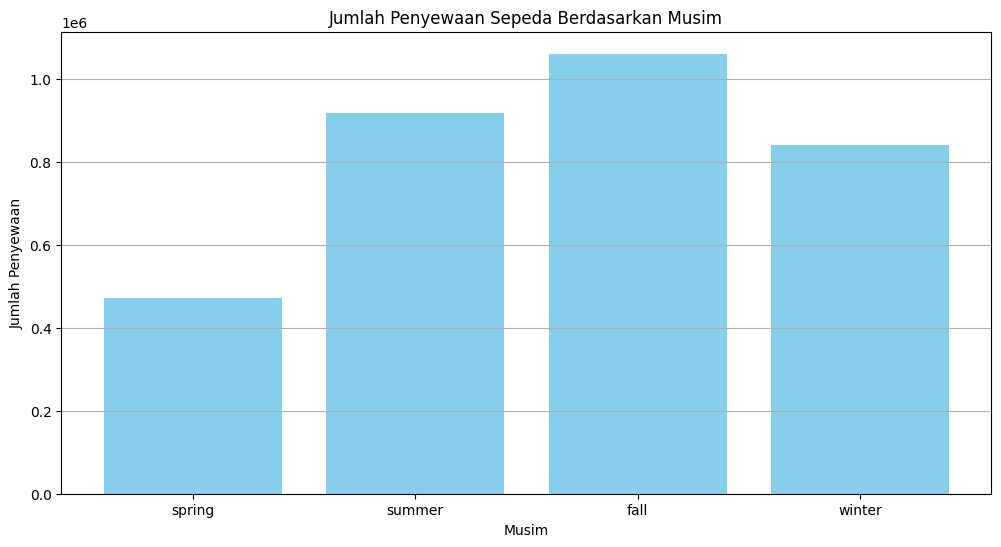

In [42]:
count_by_season = daily_df.groupby('season')['count'].sum()

plt.figure(figsize=(12, 6))
plt.bar(count_by_season.index, count_by_season.values, color='skyblue')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(count_by_season.index)
plt.grid(axis='y')
plt.show()

**Insights::**
- Dari bar plot terlihat bahwa penyewaan speda paling banyak terjadi di musim gugur(fall) dan paling sedikit ada di musim semi (spring).

**Explore Dataframe hourly_df**

In [43]:
# Menampilkan isi dataframe hourly dan informasi tambahan lainya seperti mean dll
hourly_df.describe(include='all')

,instant,dteday,season,hour,day_of_week,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count,day_type
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,4,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,fall,NaN,saturday,NaN,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays
freq,NaN,NaN,4496,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,11.546752,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,6.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,12.000000,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,18.000000,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,23.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN


**Insights:**
- Data yang bisa kita dapatkan dari dataset ini sebagian besar sudah bisa kita dpaatkan dari dataset daily, namun kita bisa melihat informasi tambahan dimana pada jam tertentu jumlah penyewa pernah menyentu angka 977 penyewa dalam satu jam, namun juga pernah hanya mendapatkan 1 penyewa saja dalam satu jam.

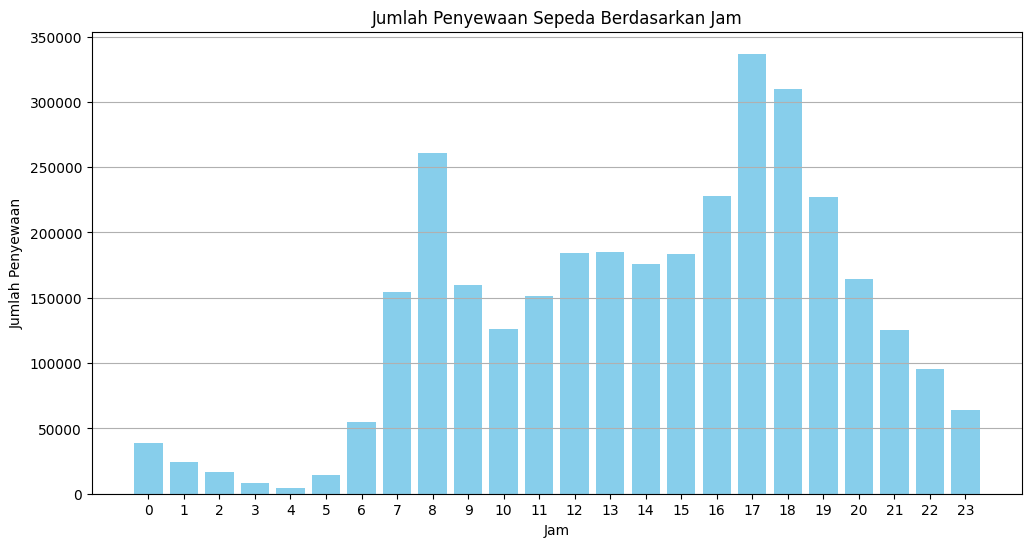

In [44]:
# penyewaan berdasarkan jam
count_by_hour = hourly_df.groupby('hour')['count'].sum()

# Membuat Bar Plot
plt.figure(figsize=(12, 6))
plt.bar(count_by_hour.index, count_by_hour.values, color='skyblue')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(count_by_hour.index) 
plt.grid(axis='y')
plt.show()

**Insights:**
- Dari bar plot diatas terlihat bahwa sebagian besar penyewaan sepeda terhadiada pukul 16:00 hingga 19:00, selain rentan waktu itu penyewaan sepeda juga mengalami kenaikan yang lumayan significant pada pukul 08:00.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah terdapat perbedaan signifikan dalam jumlah penyewaan antara pengguna berlangganan dan pengguna non-berlangganan?

            casual   registered
count   731.000000   731.000000
mean    848.176471  3656.172367
std     686.622488  1560.256377
min       2.000000    20.000000
25%     315.500000  2497.000000
50%     713.000000  3662.000000
75%    1096.000000  4776.500000
max    3410.000000  6946.000000


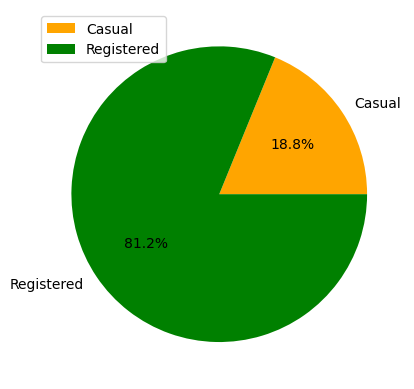

In [45]:
sum_casual = sum(daily_df['casual'])
sum_registered = sum(daily_df['registered'])

# Menampilkan informasi tambahan untuk casual dan registered
print(daily_df[['casual', 'registered']].describe())

# Membuat pie chart
data = [sum_casual, sum_registered]
label_chart = ['Casual', 'Registered']

plt.pie(data, labels=label_chart, autopct='%1.1f%%', colors=['orange', 'green'])
plt.title('')
plt.legend()
plt.show()

**Insights:**
- Kalau dilihat sekilas dari data yang dihasilkan dari fungsi ".describe" dapat kita lihat bahwa untuk kolom "casual" memiliki data yang condong ke kanan, dimana bisa terlihat nilai mean (848) jauh lebih besar dibanding median (713).
- Dan untuk pie chart dapat dilihat dengan jelas bahwa jumlah penyewa registered jauh lebih dominan dibandingkan dengan casual dengan rasio 81:19, atau 81,2% penyewa sudah terdaftar(registered) sedangkan sisanya atau 18,8% tidak(casual).

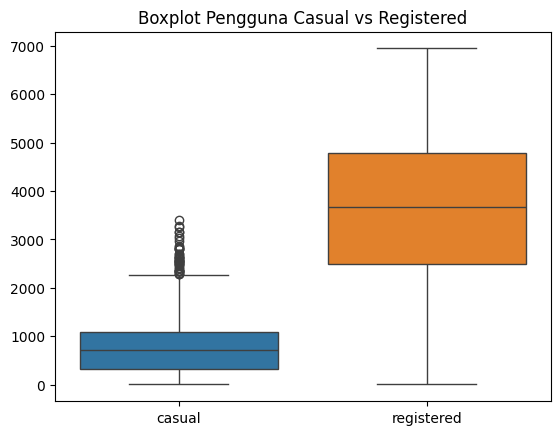

In [46]:
# Menampilkan penyebaran data casual dan registered menggunakan box-plot
sns.boxplot(data=daily_df[['casual', 'registered']])
plt.title('Boxplot Pengguna Casual vs Registered')
plt.show()

**Insight:**
- Sebenarnya dari fungsi .describe() sebelumnya sudah terlihat bahwa penyebaran data dari kolom casual bersifat right-skewed (skew kanan), di mana sebagian besar data ada di kuartil bawah, dan ada ekor panjang ke kanan. Box plot memperjelas hal ini, menunjukkan bahwa median berada di bawah pusat dan distribusi memiliki ekor panjang ke atas.
- Sedangkan untuk kolom registered, penyebaran datanya bersifat normal, di mana box plot menunjukkan simetri antara kuartil bawah dan atas.

### Pertanyaan 2: Apakah jumlah penyewaan sepeda dipengaruhi oleh musim?

C:\Users\albia\AppData\Local\Temp\ipykernel_33460\1366927808.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_by_season = daily_df.groupby('season')['count'].sum()


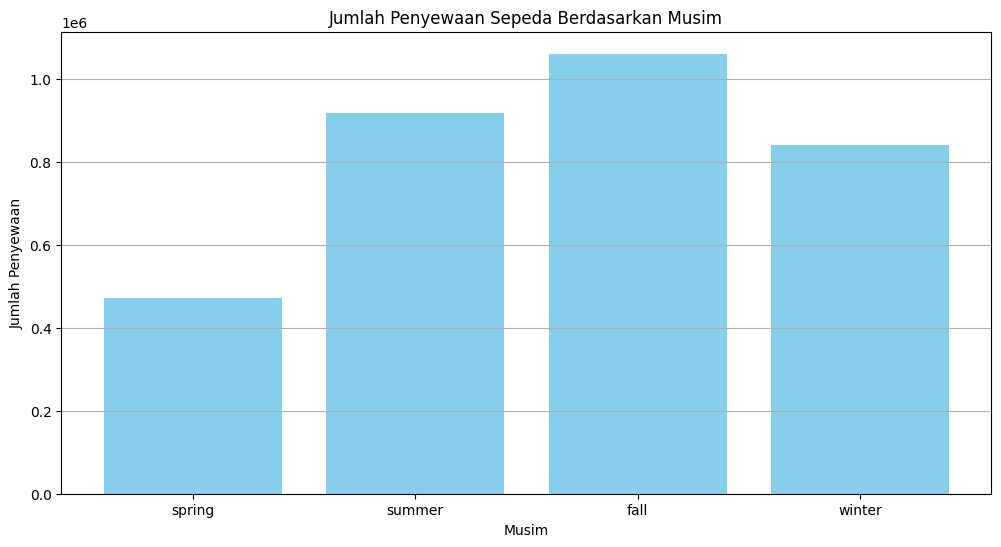

In [47]:
# Jumlah sewa berdasarkan musim
count_by_season = daily_df.groupby('season')['count'].sum()

# Menampilkan plot
plt.figure(figsize=(12, 6))
plt.bar(count_by_season.index, count_by_season.values, color='skyblue')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(count_by_season.index)
plt.grid(axis='y')
plt.show()

**Insight:**
- Dari plot terlihat jelas bahwa memang ada perbedaan yang lumayan signifikan pada jumlah peneyewaan sepeda antar musim, terutama pada musim semi (spring) dan musim dingin gugur (fall) dengan jumlah penyewaan pada musing semi tidak sampai setengah pada musim semi.
- Namun jika kita ingin tahu hubungan lebih lanjut antara musim dan jumlah penyewaan kita harus melakukan analisis lebih lanjut.

**Mencari relasi antara temp, windspeed, humidty terhadap count**

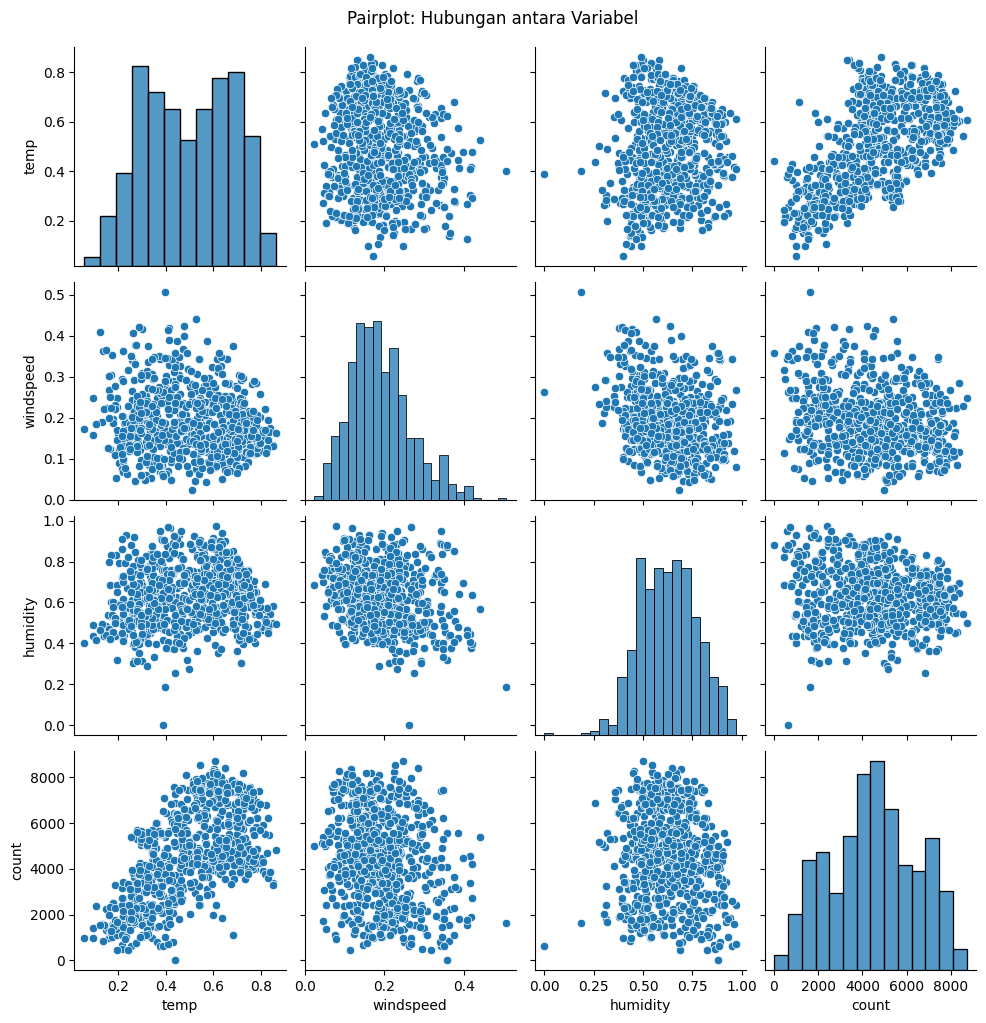

In [48]:
data = daily_df[['temp', 'windspeed', 'humidity', 'count']]

# Membuat pairplot
sns.pairplot(data)
plt.suptitle('Pairplot: Hubungan antara Variabel', y=1.02)
plt.show()

**Insights:**
- Dari chart terlihat bahwa kolom temp memiliki korelasi terhadap count dimana semakin tinggi nilai temp semakin tinggi count, sedangkan untuk windspeed dan humidity walaupun terlihat samar-samar terlihat memiliki beberapa korelasi dimana semakin tinggi nilai windspeed atau humidity maka semakin rendha nilai count.

**Mengelompokan temp, windspeed, humidty berdasarkan musim**

C:\Users\albia\AppData\Local\Temp\ipykernel_33460\722026251.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_by_season = daily_df.groupby('season')[['temp', 'humidity', 'windspeed',]].mean()


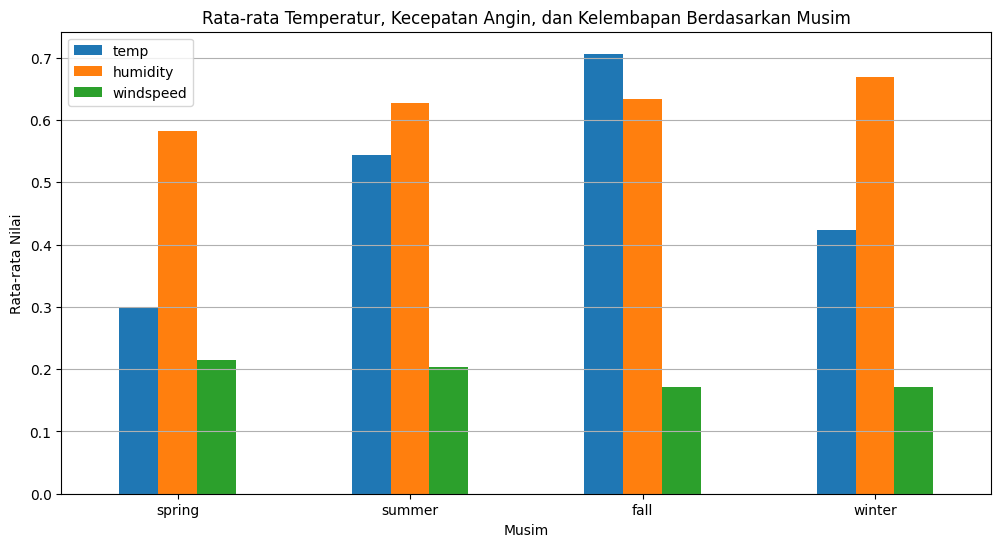

In [49]:
# Mengelompokkan berdasarkan season dan mengambil rata-rata untuk kolom windspeed, temp, atemp, humidity
weather_by_season = daily_df.groupby('season')[['temp', 'humidity', 'windspeed',]].mean()

# Membuat bar plot
weather_by_season.plot(kind='bar', figsize=(12, 6))

# Menambahkan judul dan label
plt.title('Rata-rata Temperatur, Kecepatan Angin, dan Kelembapan Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Nilai')
plt.xticks(rotation=0)  # Rotasi label di sumbu x agar lebih mudah dibaca
plt.grid(axis='y')

# Menampilkan plot
plt.show()

**Insights:**
- Dari data mengenai hubungan antara temp, humidity, dan windspeed terhadap count sekaran kita bisa tau kenapa musim gugur (fall) banyak diminati para penyewa sepeda karena pada musim itu memiliki temp paling tinggi dengan humidity dan windspeed yang relatif sedang, sedangkan kenapa semi (spring) memiliki nilai count terendah karena musim ini memiliki rata-rata temperatur paling rendah dan winspeed paling tinggi, walaupun musim semi memiliki humidity paling rendah namun karena tingginya nilai windspeed dan rendahnya temperature membuatnya memiliki nilai count yang rendah.

### Pertanyaan 3: Apakah jumlah penyewaan sepeda berubah sepanjang hari berdasarkan jam?

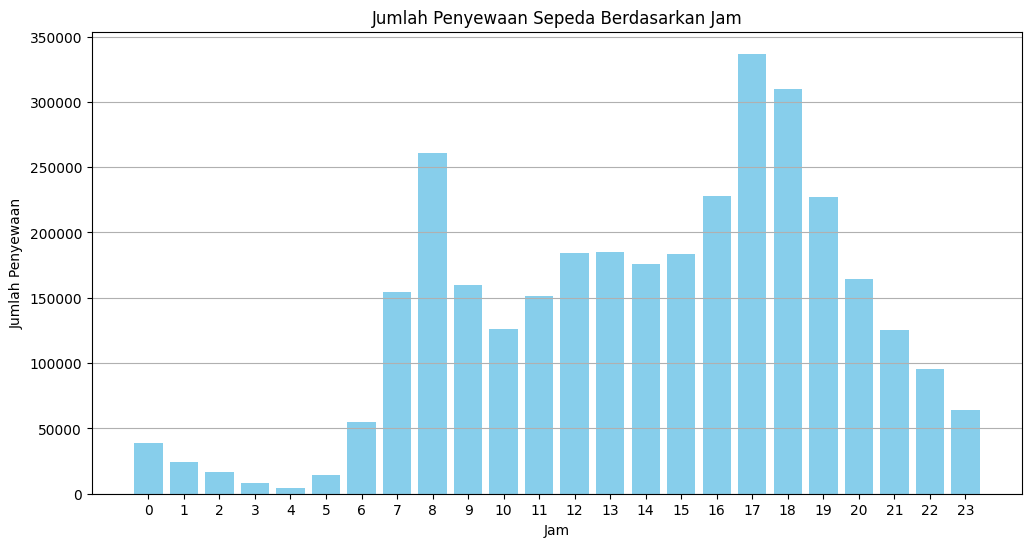

In [50]:
# penyewaan berdasarkan jam
count_by_hour = hourly_df.groupby('hour')['count'].sum()

# Membuat Bar Plot
plt.figure(figsize=(12, 6))
plt.bar(count_by_hour.index, count_by_hour.values, color='skyblue')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(count_by_hour.index) 
plt.grid(axis='y')
plt.show()

**Insights:**
- Dari bar plot diatas terlihat bahwa sebagian besar penyewaan sepeda terhadiada pukul 16:00 hingga 19:00, selain rentan waktu itu penyewaan sepeda juga mengalami kenaikan yang lumayan significant pada pukul 08:00.
- Namun sama halnya seperti hubungan musim dan count kita perlu melakukan analisis lebih lanjut untuk menemukan hubungan dari kedua kolom ini.

**Mengelompokan temp, windspeed, humidty berdasarkan jam**

Karena kita sudah tau hubungan antara temp, windspeed, humidty dengan count melalui scatter plot sebelumnya, sekarang kita hanya perlu melakukan perbandingan rata-rata nilai tersebut setiap jam nya.

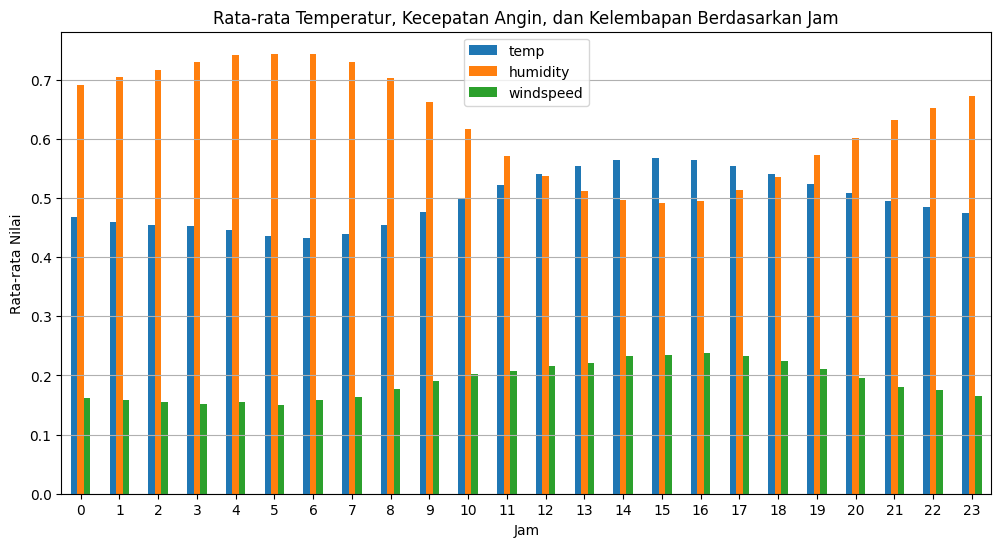

In [51]:
# Mengelompokkan berdasarkan season dan mengambil rata-rata untuk kolom windspeed, temp, atemp, humidity
weather_by_hour = hourly_df.groupby('hour')[['temp', 'humidity', 'windspeed']].mean()

# Membuat bar plot
weather_by_hour.plot(kind='bar', figsize=(12, 6))

# Menambahkan judul dan label
plt.title('Rata-rata Temperatur, Kecepatan Angin, dan Kelembapan Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Nilai')
plt.xticks(rotation=0)  # Rotasi label di sumbu x agar lebih mudah dibaca
plt.grid(axis='y')

# Menampilkan plot
plt.show()

**Insights:**
- Melihat bar chart terlihat bahwa pada pukul 13.00 hingga 19.00 memiliki temp tertinggi dengan nilai humidty terendah jadi tidak heran pada rentan ini nilai penyewaan sepeda tinggi, meskipun pad ajam ini windspeed bernilai paling tinggi namun karena nilai temp sedang paling tinggi maka nilai count pun ikut naik.
- Namun jika kita lihat pada chart sebelumya nilai penyewaan sepeda baru memuncak mulai pukul 16.00 bukan 12.00, menurut hipotesis sementara hal ini juga berkaitan dengan jam kerja, karena pada pukul 12.00 - 16.00 sebagian besar orang-orang masih dikantor jadi baru bisa menyewa sepeda.
- Sama halnya pada pukul 08.00 terjadi kenaikan yang signifikan pada penyewaan sepeda karena itu adalah jam ornag-orang mulai beraktivitas.

## Conclusion

**Pertanyaan**
- Apakah terdapat perbedaan signifikan dalam jumlah penyewaan antara pengguna berlangganan dan pengguna non-berlangganan?
- Apakah jumlah penyewaan sepeda dipengaruhi oleh musim?
- Apakah jumlah penyewaan sepeda berubah sepanjang hari berdasarkan jam?

**Conclusion**
- Conclution pertanyaan 1: Dari hasil visualisasi terlihat jelas bahwa terdapat perbedaan yang signifikan antara pengguna casual (non-berlanggangan) dan pengguna berlanggangan (registered), selain itu ditemukan bahwa data penyewaan casual bersifat right-skewed dimana sebagian besar datanya berfokus di kuartil bawah.
- Conclution pertanyaan 2 : Berdasarkan bar-plot yang menunjukan hubungan antara jumlah penyewaan dan musim terlihat terdapat perbedaan yang lumayan signifikan sehingga menyimpulkan bahwa musim mempengarhui jumlah penyewaan sepeda, dimana pada musim gugur (fall) total penyewaan sepeda lebih dari dua kali total penyewaan pada musim semi (spring).
- Conclution pertanyaan 3 : Berdasarkan bar-plot yang menunjukan hubungan antara jumlah penyewaan dan jam terlihat bahwa penyewaan sepeda sangat bervariasi berdasarkan jam, hal ini juga dipengaruhi oleh nilai temp, humidity dan windspeed setiap jam, namun terdapat beberapa anomali seperti meskipun pada pukul 08:00 nilai temp tidak terlalu tinggi dan humidity sangat tinggi namun nilai count sangat tinggi dan bagaimana nilai count baru naik signifikan pada jam 16:00 bukanya jam 12:00, hal ini dikarenakan faktor di luar dataset yaitu dimana pada saat 08:00 orang-orang perlu kendaraan untuk memulai aktifitas nya dan pada pukul 16:00 baru selesai dari bekerja.

# Analisis lanjutan

### Clustering
**Manual Binning**


1. Menggunakan manual binning untuk temp

C:\Users\albia\AppData\Local\Temp\ipykernel_33460\567238767.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_avg_cluster = daily_df.groupby('temp_cluster')['count'].mean()


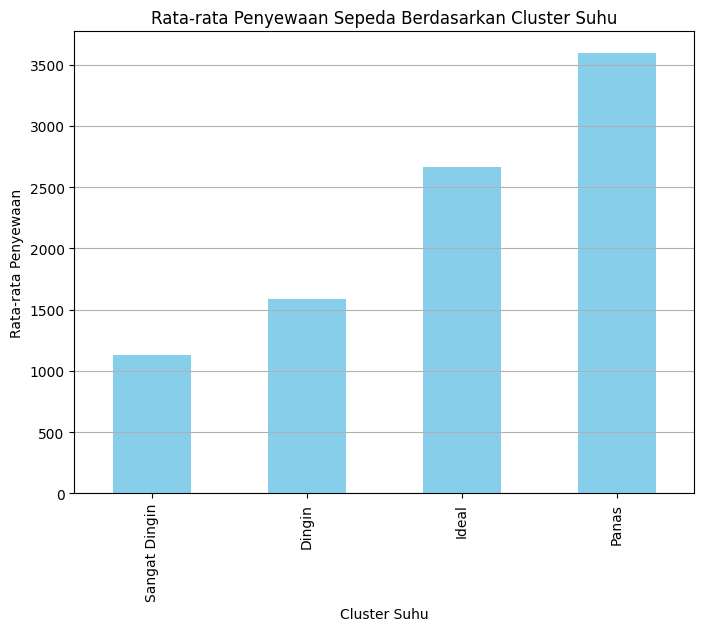

In [52]:
# Mengubah nilai temp agar sesuai
daily_df['temp'] = daily_df['temp']*100

# Membuat bin untuk suhu
bins = [0, 10, 20, 30, 40]
labels = ['Sangat Dingin', 'Dingin', 'Ideal', 'Panas']
daily_df['temp_cluster'] = pd.cut(daily_df['temp'], bins=bins, labels=labels)

# Mengelompokkan berdasarkan cluster suhu dan menghitung rata-rata jumlah penyewaan
temp_avg_cluster = daily_df.groupby('temp_cluster')['count'].mean()

# Menampilkan hasil dalam bentuk bar chart
temp_avg_cluster.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Cluster Suhu')
plt.xlabel('Cluster Suhu')
plt.ylabel('Rata-rata Penyewaan')
plt.grid(axis='y')
plt.show()

**Insights:**
- Terlihat bahwa orang-orang sering menyewa sepeda saat cuaca panas

2. Menggunakan manual binning untuk Humidity

C:\Users\albia\AppData\Local\Temp\ipykernel_33460\90792017.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  humidity_avg_cluster = daily_df.groupby('humidity_cluster')['count'].mean()


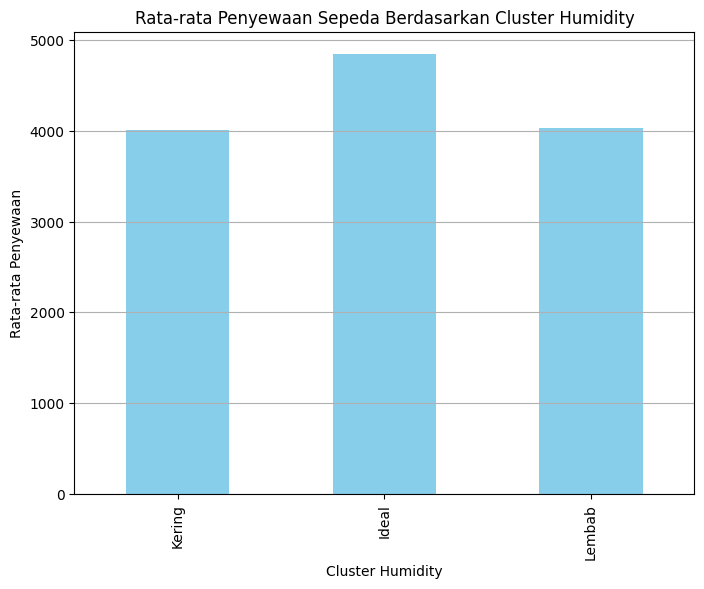

In [53]:
# Mengubah nilai humidity agar sesuai
daily_df['humidity'] = daily_df['humidity']*100

# Membuat bin untuk suhu
bins = [0, 45, 70, 100]
labels = ['Kering', 'Ideal', 'Lembab']
daily_df['humidity_cluster'] = pd.cut(daily_df['humidity'], bins=bins, labels=labels)

# Mengelompokkan berdasarkan cluster suhu dan menghitung rata-rata jumlah penyewaan
humidity_avg_cluster = daily_df.groupby('humidity_cluster')['count'].mean()

# Menampilkan hasil dalam bentuk bar chart
humidity_avg_cluster.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Cluster Humidity')
plt.xlabel('Cluster Humidity')
plt.ylabel('Rata-rata Penyewaan')
plt.grid(axis='y')
plt.show()

**Insights:**
- Terlihat bahwa orang-orang sering menyewa sepeda saat tingkat kelembapanya ideal